In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw = pd.read_csv(r'C:\Users\wlgus\Desktop\dataset\train.csv')
raw.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
raw.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
raw['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [9]:
raw['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [10]:
raw['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [12]:
raw['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
raw['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [7]:
raw.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [15]:
raw['Product_Category_2'].fillna(raw['Product_Category_2'].mean(), inplace = True)
raw['Product_Category_3'].fillna(raw['Product_Category_3'].mean(), inplace = True)

In [17]:
data = raw.drop(['User_ID', 'Product_ID'], axis = 1)

In [18]:
data.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
5,M,26-35,15,A,3,0,1,2.000000,12.668243,15227
6,M,46-50,7,B,2,1,1,8.000000,17.000000,19215
7,M,46-50,7,B,2,1,1,15.000000,12.668243,15854
8,M,46-50,7,B,2,1,1,16.000000,12.668243,15686
9,M,26-35,20,A,1,1,8,9.842329,12.668243,7871


In [19]:
data.rename( columns = { 'Purchase' : 'Purchase_amount', 'Product_Category_1' : 'prod_1', 'Product_Category_2' : 'prod_2',
                        'Product_Category_3' : 'prod_3', 'Stay_In_Current_City_Years' : 'years_residing'}, inplace = True)

data.head()

,Gender,Age,Occupation,City_Category,years_residing,Marital_Status,prod_1,prod_2,prod_3,Purchase_amount
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [41]:
gender_group = data.groupby( by = 'Gender')['Purchase_amount'].agg('mean')
gender_group

Gender
F    8734.565765
M    9437.526040
Name: Purchase_amount, dtype: float64

<Axes: xlabel='Gender'>

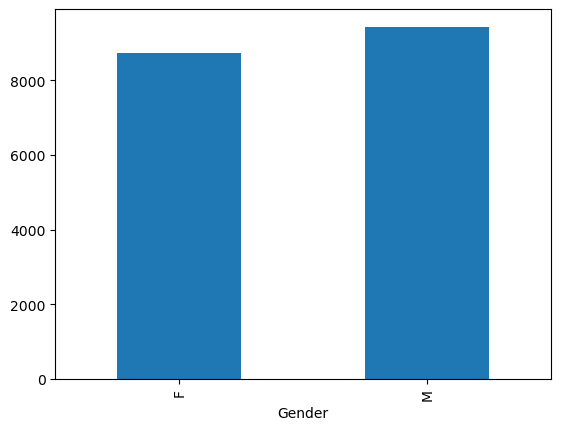

In [44]:
gender_group.plot( kind = 'bar')

In [34]:
gender_df = data.pivot_table( index = 'Gender', values = 'Purchase_amount', aggfunc = 'mean')
gender_df.reset_index(inplace = True)
gender_df

,Gender,Purchase_amount
0,F,8734.565765
1,M,9437.526040


<Axes: xlabel='Gender', ylabel='Purchase_amount'>

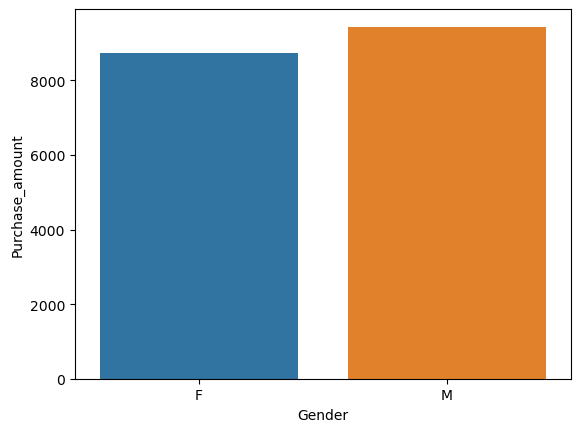

In [35]:
sns.barplot(gender_df, x = 'Gender', y = 'Purchase_amount')

In [36]:
age_df = data.pivot_table( index = 'Age', values = 'Purchase_amount', aggfunc = 'mean')
age_df.reset_index(inplace = True)
age_df

,Age,Purchase_amount
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


<Axes: xlabel='Age', ylabel='Purchase_amount'>

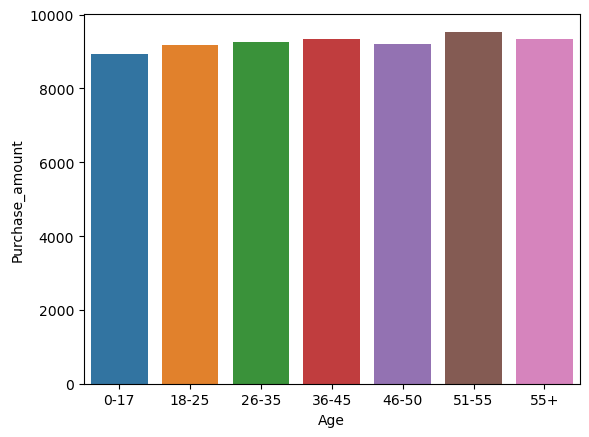

In [37]:
sns.barplot( data = age_df, x = 'Age', y = 'Purchase_amount' )

In [48]:
occupation_df = data.pivot_table( index = 'Occupation', values = 'Purchase_amount', aggfunc = 'mean')
occupation_df.reset_index(inplace = True)

<Axes: xlabel='Occupation', ylabel='Purchase_amount'>

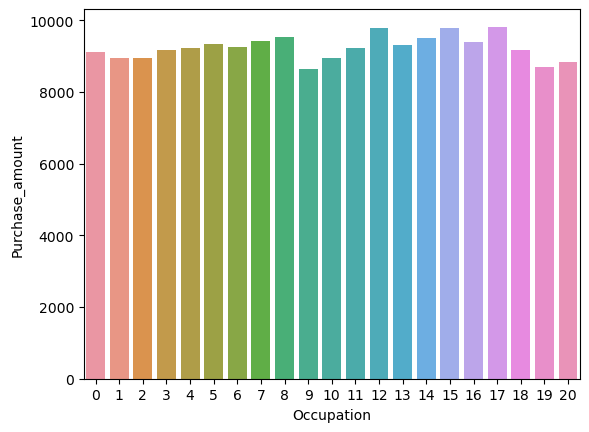

In [49]:
sns.barplot( data = occupation_df, x = 'Occupation', y = 'Purchase_amount' )

In [54]:
occupation_df.sort_values(by = 'Purchase_amount', ascending = False)

,Occupation,Purchase_amount
17,17,9821.478236
12,12,9796.640239
15,15,9778.891163
8,8,9532.592497
14,14,9500.702772
7,7,9425.728223
16,16,9394.464349
5,5,9333.149298
13,13,9306.351061
6,6,9256.535691


In [60]:
marital_df = data.pivot_table(index = 'Marital_Status', values = 'Purchase_amount', aggfunc = 'mean')
marital_df = marital_df.reset_index()

<Axes: xlabel='Marital_Status', ylabel='Purchase_amount'>

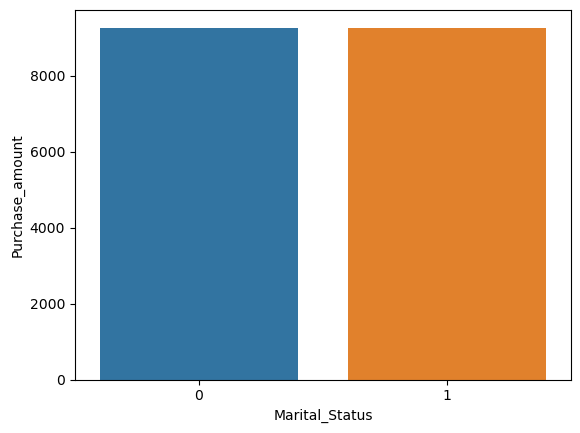

In [63]:
sns.barplot(marital_df, x = 'Marital_Status', y = 'Purchase_amount')

In [65]:
marital_df

,Marital_Status,Purchase_amount
0,0,9265.907619
1,1,9261.174574


In [66]:
city_df = data.pivot_table(index = 'City_Category', values = 'Purchase_amount', aggfunc = 'mean')
city_df = city_df.reset_index()

([<matplotlib.patches.Wedge at 0x1e7199f3400>,
 [Text(0.5871678618099486, 0.9301794999125347, 'A'),
  Text(-1.0954122664421986, 0.10035918756130917, 'B'),
  Text(0.499853655656805, -0.9798705643739526, 'C')],
 [Text(0.32027337916906284, 0.5073706363159279, '32.08%'),
  Text(-0.5974975998775628, 0.054741375033441356, '32.94%'),
  Text(0.27264744854007544, -0.5344748532948832, '34.98%')])

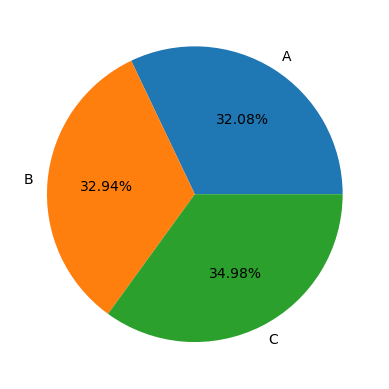

In [72]:
plt.pie( city_df['Purchase_amount'], labels = city_df['City_Category'], autopct = '%0.2f%%')